In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py


In [2]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)

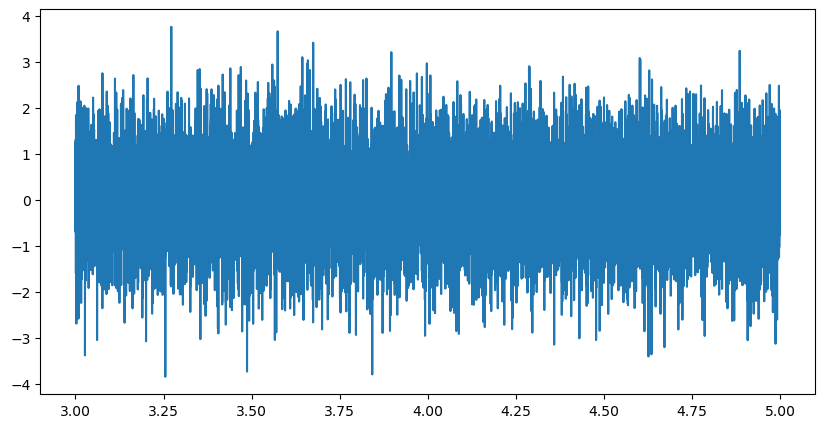

In [3]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

Поиск мат. ожидания

In [4]:
M = np.mean(X).round(5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(X) == M

In [7]:
D = np.var(X).round(5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(X, M) == D